In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("../loging.log", "r") as f:
    file = [s.strip().split("#") for s in f.readlines()]

In [3]:
file[0].insert(2, 'strategy')

In [4]:
df = pd.DataFrame(file)
header = df.iloc[0]

df = df[1:]
df.columns = header
type_map = {"method": "str"}
for h in header[2:]:
    type_map[h] = "int32"

In [5]:
df = df.astype(type_map)

In [6]:
df.head()

,datastructure,method,strategy,k,n_neighbors,n_batch,n_line_train0,n_line_train1,n_line_train2,n_line_train3,...,query_time7,predicition_time0,predicition_time1,predicition_time2,predicition_time3,predicition_time4,predicition_time5,predicition_time6,predicition_time7,total
1,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,374736,9,9,9,10,9,8,9,11,404276
2,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,373819,9,9,9,8,10,10,11,9,396474
3,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,348829,10,10,10,8,10,8,8,8,372474
4,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,351849,10,9,10,8,10,11,9,8,375572
5,[RustVector],"""deepcopy""",1,15000,30,2,12500,12500,12500,12500,...,355022,10,8,10,8,10,10,8,10,380467


In [7]:
df.columns

Index(['datastructure', 'method', 'strategy', 'k', 'n_neighbors', 'n_batch',
       'n_line_train0', 'n_line_train1', 'n_line_train2', 'n_line_train3',
       'n_line_train4', 'n_line_train5', 'n_line_train6', 'n_line_train7',
       'n_line_test0', 'n_line_test1', 'n_line_test2', 'n_line_test3',
       'n_line_test4', 'n_line_test5', 'n_line_test6', 'n_line_test7',
       'preprocess_time0', 'preprocess_time1', 'preprocess_time2',
       'preprocess_time3', 'preprocess_time4', 'preprocess_time5',
       'preprocess_time6', 'preprocess_time7', 'query_time0', 'query_time1',
       'query_time2', 'query_time3', 'query_time4', 'query_time5',
       'query_time6', 'query_time7', 'predicition_time0', 'predicition_time1',
       'predicition_time2', 'predicition_time3', 'predicition_time4',
       'predicition_time5', 'predicition_time6', 'predicition_time7', 'total'],
      dtype='object', name=0)

In [8]:
df["method"].unique()

array(['"deepcopy"', '"arc"'], dtype=object)

In [9]:
df["strategy"].unique()

array([1, 2])

In [10]:
df["n_batch"].unique()

array([2, 3])

In [11]:
df["n_neighbors"].unique()

array([30])

In [12]:
# method & n_batch & k -> total, preprocess_time, query_time, mean(total), mean(preprocess), mean(queer)

In [13]:
preprocess_cols = ["preprocess_time" + str(i) for i in range(8)]
query_cols = ["query_time" + str(i) for i in range(8)]
total_col = ["total"]

agg_v = df.groupby(["method", "strategy","n_batch", "k", "n_neighbors"])[preprocess_cols + query_cols + total_col]

In [14]:
agg_mean = agg_v.mean()

In [16]:
agg_mean

0                                              preprocess_time0  \
method     strategy n_batch k     n_neighbors                     
"arc"      1        2       15000 30                    38192.0   
                            20000 30                    43749.8   
                    3       15000 30                    37269.2   
                            20000 30                    40814.2   
                            25000 30                    45042.0   
           2        2       15000 30                    37443.0   
                            20000 30                    42059.2   
                            25000 30                    46942.4   
                    3       15000 30                    36228.8   
                            20000 30                    40806.0   
                            25000 30                    46230.6   
"deepcopy" 1        2       15000 30                    27567.6   
                            20000 30                    32621.2   
                    3       15000 30                    23171.0   
                            20000 30                    26254.6   
                            25000 30                    29063.4   
           2        2       15000 30                    31785.4   
                            20000 30                    35051.6   
                            25000 30                    37546.6   
                    3       15000 30                    27920.0   
                            20000 30                    32536.6   
                            25000 30                    35317.4   

0                                              preprocess_time1  \
method     strategy n_batch k     n_neighbors                     
"arc"      1        2       15000 30                    31860.6   
                            20000 30                    36748.0   
                    3       15000 30                    31552.4   
                            20000 30                    34549.6   
                            25000 30                    38259.2   
           2        2       15000 30                    30991.6   
                            20000 30                    35809.2   
                            25000 30                    40262.2   
                    3       15000 30                    30718.8   
                            20000 30                    34837.6   
                            25000 30                    39497.4   
"deepcopy" 1        2       15000 30                    22793.0   
                            20000 30                    27489.0   
                    3       15000 30                    18686.8   
                            20000 30                    21466.4   
                            25000 30                    24209.4   
           2        2       15000 30                    26350.0   
                            20000 30                    29744.2   
                            25000 30                    33523.2   
                    3       15000 30                    25357.6   
                            20000 30                    28940.8   
                            25000 30                    30746.8   

0                                              preprocess_time2  \
method     strategy n_batch k     n_neighbors                     
"arc"      1        2       15000 30                    29195.6   
                            20000 30                    33055.4   
                    3       15000 30                    29225.0   
                            20000 30                    32712.8   
                            25000 30                    36055.8   
           2        2       15000 30                    28043.6   
                            20000 30                    32431.6   
                            25000 30                    36256.2   
                    3       15000 30                    27657.0   
                            20000 30         

In [20]:
agg_reidx = agg_mean.reset_index(level=['method', "strategy", 'n_batch', 'k'])

In [21]:
neighbor_impact = agg_reidx[(agg_reidx["method"] == '"deepcopy"') & (agg_reidx["strategy"] == 1) & (agg_reidx['n_batch'] == 2) & (agg_reidx['k'] == 15000)]

In [22]:
neighbor_impact

,method,strategy,n_batch,k,preprocess_time0,preprocess_time1,preprocess_time2,preprocess_time3,preprocess_time4,preprocess_time5,...,preprocess_time7,query_time0,query_time1,query_time2,query_time3,query_time4,query_time5,query_time6,query_time7,total
n_neighbors,,,,,,,,,,,,,,,,,,,,,
30,"""deepcopy""",1,2,15000,27567.6,22793.0,20626.0,20683.2,19990.0,21052.6,...,20970.6,357681.0,360591.0,361672.2,361982.4,361695.6,360953.0,362474.0,360851.0,385852.6


In [24]:
# m_preprocess = list()
# m_query = list()
# for i in [10 , 20 , 30]:
#     m_preprocess.append(neighbor_impact[neighbor_impact["n_neighbors"] == i][preprocess_cols].values.mean())
#     m_query.append(neighbor_impact[neighbor_impact["n_neighbors"] == i][query_cols].values.mean())

In [25]:
m_preprocess

[]

In [250]:
m_query

[nan, nan, 377748.775]

In [251]:
# n_neighbors does not have impact to runtime performance

In [31]:
agg_v = df.groupby(["method", "strategy", "n_batch", "k"])[preprocess_cols + query_cols + total_col]

In [32]:
agg_mean = agg_v.mean()

In [33]:
agg_mean

0                                  preprocess_time0  preprocess_time1  \
method     strategy n_batch k                                           
"arc"      1        2       15000           38192.0           31860.6   
                            20000           43749.8           36748.0   
                    3       15000           37269.2           31552.4   
                            20000           40814.2           34549.6   
                            25000           45042.0           38259.2   
           2        2       15000           37443.0           30991.6   
                            20000           42059.2           35809.2   
                            25000           46942.4           40262.2   
                    3       15000           36228.8           30718.8   
                            20000           40806.0           34837.6   
                            25000           46230.6           39497.4   
"deepcopy" 1        2       15000           27567.6           22793.0   
                            20000           32621.2           27489.0   
                    3       15000           23171.0           18686.8   
                            20000           26254.6           21466.4   
                            25000           29063.4           24209.4   
           2        2       15000           31785.4           26350.0   
                            20000           35051.6           29744.2   
                            25000           37546.6           33523.2   
                    3       15000           27920.0           25357.6   
                            20000           32536.6           28940.8   
                            25000           35317.4           30746.8   

0                                  preprocess_time2  preprocess_time3  \
method     strategy n_batch k                                           
"arc"      1        2       15000           29195.6           29644.0   
                            20000           33055.4           33756.2   
                    3       15000           29225.0           29801.6   
                            20000           32712.8           32929.8   
                            25000           36055.8           36700.2   
           2        2       15000           28043.6           28898.4   
                            20000           32431.6           33324.2   
                            25000           36256.2           37306.8   
                    3       15000           27657.0           28977.4   
                            20000           28741.2           32726.4   
                            25000           35004.4           37511.0   
"deepcopy" 1        2       15000           20626.0           20683.2   
                            20000           24505.8           25401.8   
                    3       15000           16424.8           16450.4   
                            20000           19092.2           19516.0   
                            25000           21556.8           21933.2   
           2        2       15000           24658.4           25698.4   
                            20000           28591.6           29153.4   
                            25000           30848.2           32544.2   
                    3       15000           21947.0           23905.6   
                            20000           25950.0           27754.8   
                            25000           28698.0           31174.4   

0                                  preprocess_time4  preprocess_time5  \
method     strategy n_batch k                                           
"arc"      1        2       15000           29092.4           29838.2   
                            20000           32913.6           33691.2   
                    3       15000           29372.2           29982.6   
                            20000           31889.4           32799.4   
                            25000           36096.6     

In [34]:
agg_mean = agg_mean.reset_index(["method", "strategy","n_batch", "k"])

In [42]:
agg_mean

,method,strategy,n_batch,k,preprocess_time0,preprocess_time1,preprocess_time2,preprocess_time3,preprocess_time4,preprocess_time5,...,preprocess_time7,query_time0,query_time1,query_time2,query_time3,query_time4,query_time5,query_time6,query_time7,total
0,"""arc""",1,2,15000,38192.0,31860.6,29195.6,29644.0,29092.4,29838.2,...,30078.2,341510.2,344587.8,347133.0,346956.4,345949.6,346506.4,346080.4,346340.4,381219.2
1,"""arc""",1,2,20000,43749.8,36748.0,33055.4,33756.2,32913.6,33691.2,...,34209.2,459361.8,462932.4,464432.4,464875.6,465569.4,465471.6,464659.6,463405.4,504721.2
2,"""arc""",1,3,15000,37269.2,31552.4,29225.0,29801.6,29372.2,29982.6,...,30202.2,224385.6,228378.2,230357.2,229862.0,230044.8,229568.0,229837.6,229817.8,263284.8
3,"""arc""",1,3,20000,40814.2,34549.6,32712.8,32929.8,31889.4,32799.4,...,33219.4,301796.4,305935.4,307679.4,307589.4,308058.2,307314.6,307483.0,307117.4,344377.4
4,"""arc""",1,3,25000,45042.0,38259.2,36055.8,36700.2,36096.6,36662.0,...,37159.6,383283.2,387766.0,388447.0,389190.8,389922.4,389081.6,389622.6,388369.8,430242.6
5,"""arc""",2,2,15000,37443.0,30991.6,28043.6,28898.4,27572.6,29313.2,...,29472.0,342055.4,346759.4,345315.6,347165.0,344733.0,347871.4,346302.4,347219.2,379515.8
6,"""arc""",2,2,20000,42059.2,35809.2,32431.6,33324.2,32144.6,33738.6,...,34062.2,461504.6,465991.0,463516.2,465217.8,463576.2,466756.8,465008.8,466865.8,503582.4
7,"""arc""",2,2,25000,46942.4,40262.2,36256.2,37306.8,35170.2,37410.6,...,37885.8,599663.4,604754.4,600674.4,602678.6,600014.8,605897.4,603667.6,605782.4,646727.6
8,"""arc""",2,3,15000,36228.8,30718.8,27657.0,28977.4,26694.2,29516.6,...,29628.2,226616.8,230210.0,229599.4,230347.4,228797.0,231712.2,231242.6,230609.6,262865.2
9,"""arc""",2,3,20000,40806.0,34837.6,28741.2,32726.4,30114.0,32914.4,...,33214.0,304944.2,309409.2,306684.8,309471.4,308437.8,310386.8,311504.8,309362.6,345770.2


In [48]:
t_preprocess = np.array([])
t_query = np.array([])
for method in agg_mean['method'].unique():
    for strategy in agg_mean['strategy'].unique():
        for n_batch in agg_mean['n_batch'].unique():
            for k in agg_mean['k'].unique():
                if (strategy == 1 and n_batch == 2 and k == 25000):
                    continue
                row = agg_mean[(agg_mean['method'] == method) & 
                               (agg_mean['strategy'] == strategy) &
                               (agg_mean['n_batch'] == n_batch) &
                               (agg_mean['k'] == k)]
                t_preprocess = np.append(t_preprocess, row[preprocess_cols].values.sum())
                t_query = np.append(t_query, row[query_cols].values.sum())
agg_mean['preprocess_total'] = t_preprocess
agg_mean['query_total'] = t_query

In [49]:
t_preprocess

array([247795. , 281690.4, 247269. , 271881.8, 302301.6, 240893.6,
       277299.6, 308367.6, 238702.8, 266149.4, 306076.4, 174539.4,
       211149.6, 140389. , 162987.4, 183876.2, 208635.4, 236908.8,
       260228.4, 191537. , 223575.6, 247537. ])

In [50]:
agg_total = agg_mean[["method", "strategy", "n_batch", "k", 'preprocess_total', 'query_total', 'total']]

In [51]:
agg_total

,method,strategy,n_batch,k,preprocess_total,query_total,total
0,"""arc""",1,2,15000,247795.0,2765064.2,381219.2
1,"""arc""",1,2,20000,281690.4,3710708.2,504721.2
2,"""arc""",1,3,15000,247269.0,1832251.2,263284.8
3,"""arc""",1,3,20000,271881.8,2452973.8,344377.4
4,"""arc""",1,3,25000,302301.6,3105683.4,430242.6
5,"""arc""",2,2,15000,240893.6,2767421.4,379515.8
6,"""arc""",2,2,20000,277299.6,3718437.2,503582.4
7,"""arc""",2,2,25000,308367.6,4823133.0,646727.6
8,"""arc""",2,3,15000,238702.8,1839135.0,262865.2
9,"""arc""",2,3,20000,266149.4,2470201.6,345770.2


In [56]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

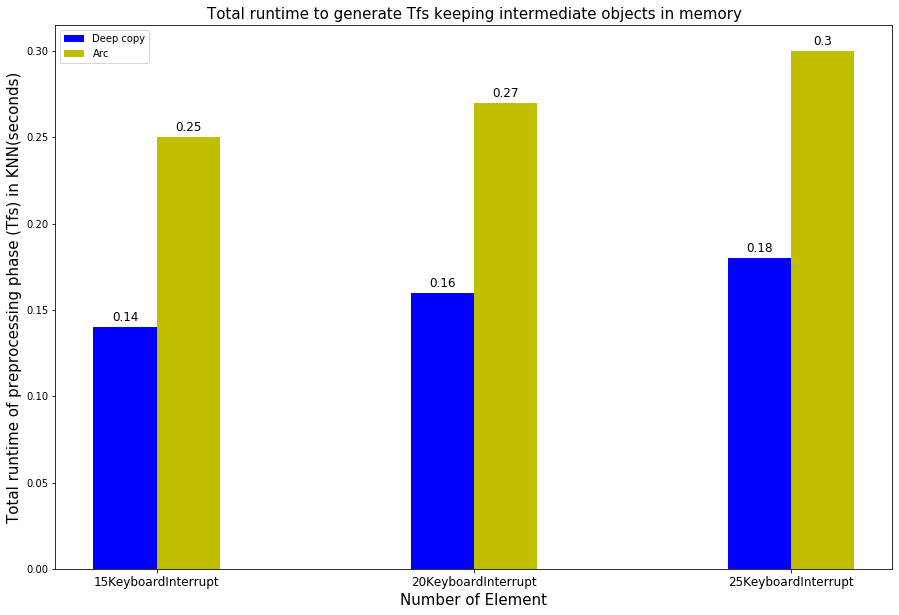

In [87]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["preprocess_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["preprocess_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "KeyboardInterrupt" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to generate Tfs keeping intermediate objects in memory", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

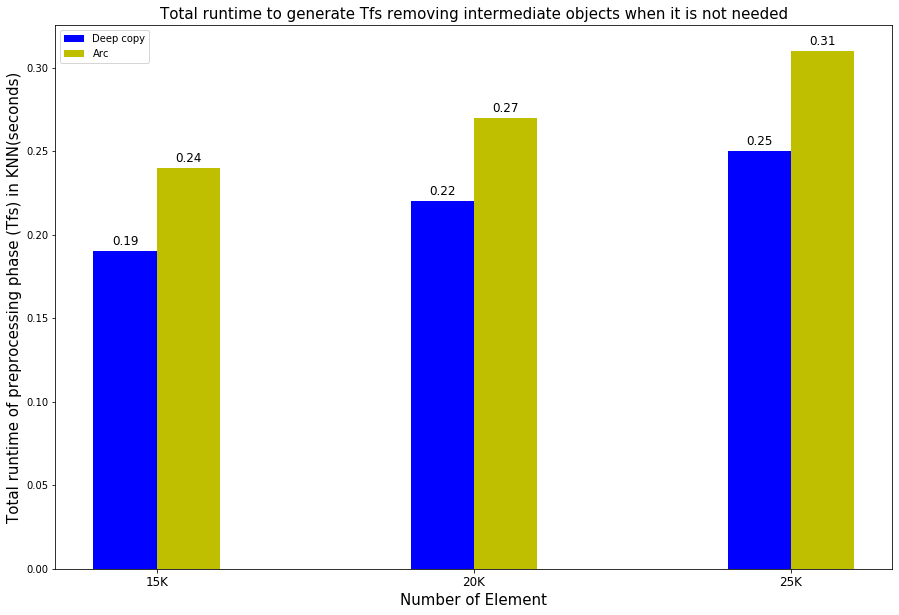

In [86]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["preprocess_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["preprocess_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to generate Tfs removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

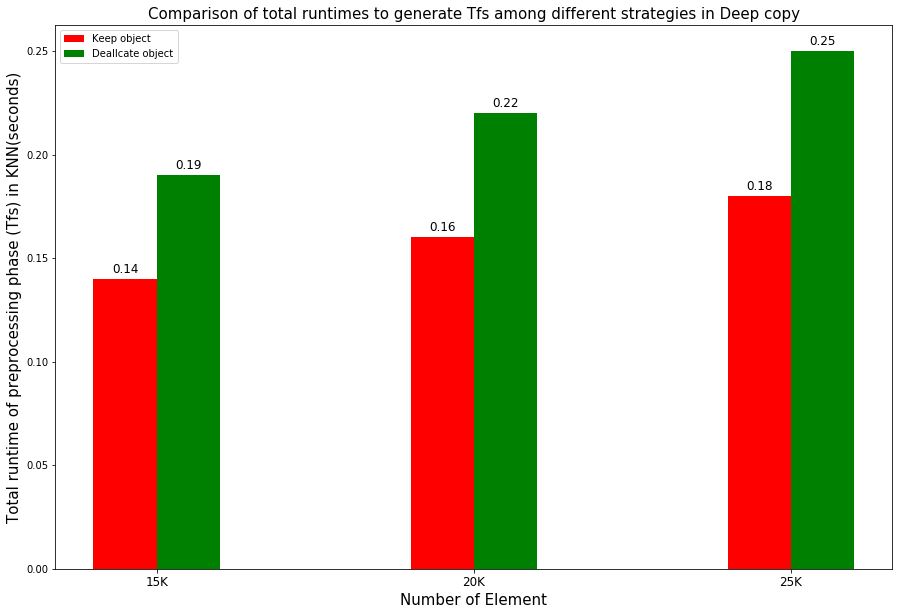

In [83]:
strategy1 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
strategy2 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(strategy1["preprocess_total"] / 1000000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx + w / 2, round(strategy2["preprocess_total"] / 1000000, 2), width = w, color ='g', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Comparison of total runtimes to generate Tfs among different strategies in Deep copy", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Keep object", "Deallcate object"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

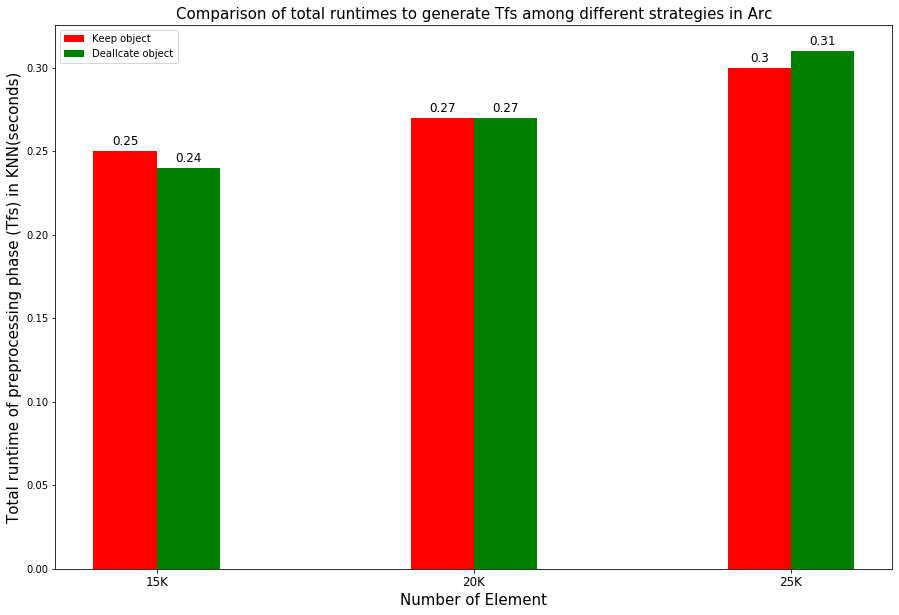

In [84]:
strategy1 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
strategy2 = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(strategy1["preprocess_total"] / 1000000, 2), width = w, color ='r', align = 'center')
b2 = ax.bar(idx + w / 2, round(strategy2["preprocess_total"] / 1000000, 2), width = w, color ='g', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of preprocessing phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Comparison of total runtimes to generate Tfs among different strategies in Arc", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Keep object", "Deallcate object"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

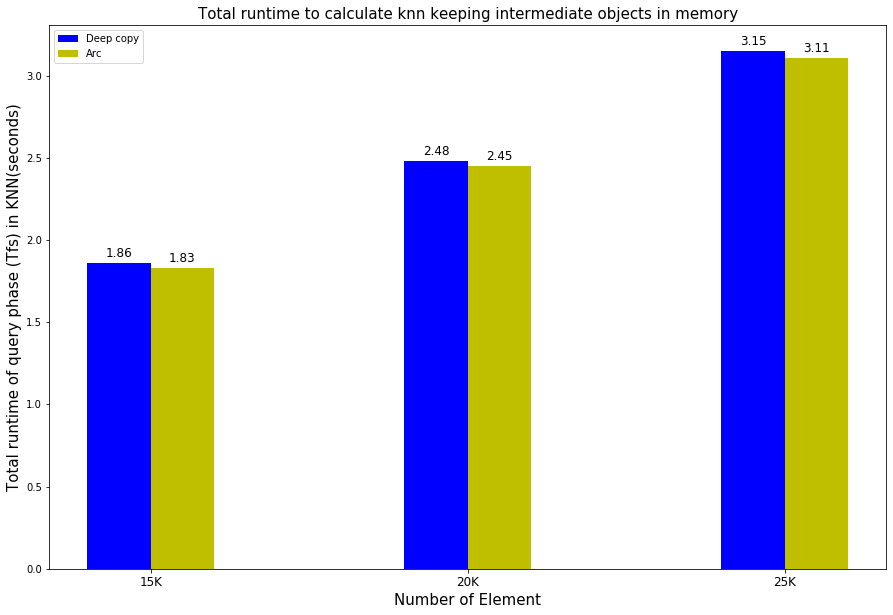

In [91]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 1) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["query_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["query_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn keeping intermediate objects in memory", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

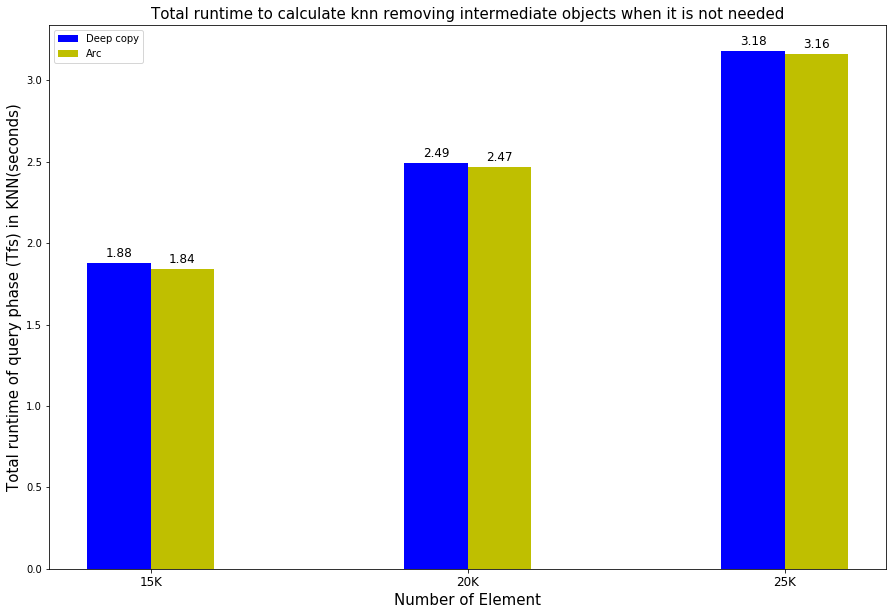

In [92]:
deepcopy = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
arc = agg_total[(agg_total["method"] == '"arc"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(deepcopy["query_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(arc["query_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Deep copy", "Arc"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()

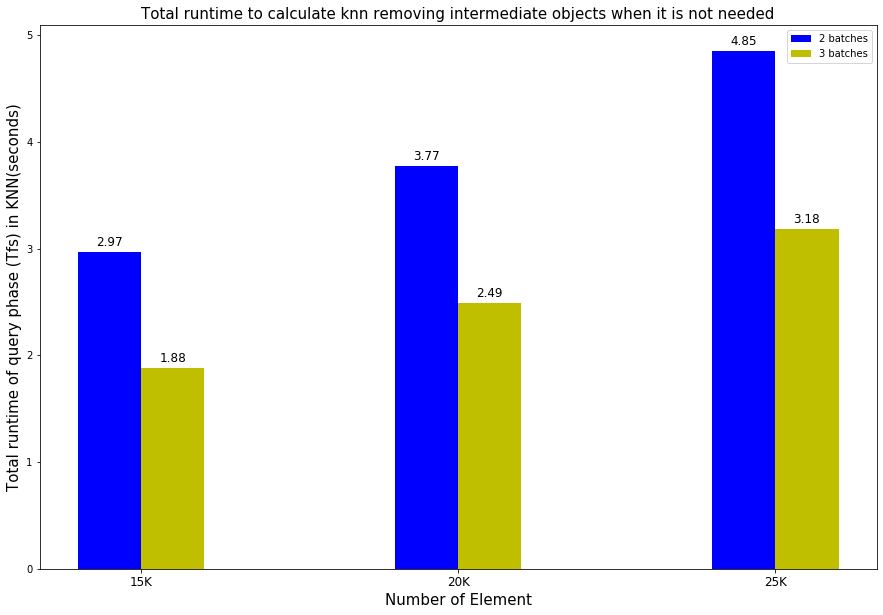

In [96]:
batch2 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 2)]
batch3 = agg_total[(agg_total["method"] == '"deepcopy"') & (agg_total["strategy"] == 2) & (agg_total["n_batch"] == 3)]
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(agg_total['k'].nunique())
b1 = ax.bar(idx - w / 2, round(batch2["query_total"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(batch3["query_total"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(agg_total['k'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(int(n)) + "K" for n in (label / 1000)], fontsize = 12)
ax.set_xlabel("Number of Element", fontsize = 15)
ax.set_ylabel("Total runtime of query phase (Tfs) in KNN(seconds)", fontsize = 15)
ax.set_title("Total runtime to calculate knn removing intermediate objects when it is not needed", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("2 batches", "3 batches"))
##ax.set_yscale('log')
#fig.savefig("rust_tree_aggregate.eps")
plt.show()